<a href="https://colab.research.google.com/github/sanjay7178/WeedsBostonTrain/blob/main/Boston_RESNET_final_notebook_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from keras.applications.vgg16 import VGG16
# resnet 50
from keras.applications.resnet import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from matplotlib import pyplot as plt
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
!cp '/content/drive/MyDrive/resent weed detection/colab/output4.zip' .

In [54]:
!unzip /content/output4.zip

Archive:  /content/output4.zip
   creating: output4/
   creating: output4/train/
   creating: output4/train/CROWFOOT GRASS/
  inflating: output4/train/CROWFOOT GRASS/03e0ed29-50c9-4872-b174-8d8287b33cfa.jpeg  
  inflating: output4/train/CROWFOOT GRASS/dttae_20080609_1012160_10.jpg  
  inflating: output4/train/CROWFOOT GRASS/d8862aad-4fd3-4b15-8781-d6b4a513b009.jpeg  
  inflating: output4/train/CROWFOOT GRASS/6f511a58-8372-42a1-ae11-ae00091f019a.jpeg  
  inflating: output4/train/CROWFOOT GRASS/2051960663.JPG  
  inflating: output4/train/CROWFOOT GRASS/download (5).jpg  
  inflating: output4/train/CROWFOOT GRASS/4d412f34-cdc3-479b-b053-ff322ef82f29.jpeg  
  inflating: output4/train/CROWFOOT GRASS/dttae_20080124_112136.jpg  
  inflating: output4/train/CROWFOOT GRASS/394a46b0-e511-426f-b497-9d80ea94d495.jpeg  
  inflating: output4/train/CROWFOOT GRASS/egyptian-crowfoot-grass-member-family-poaceae-native-africa-grows-heavy-soils-damp-sites-dactyloctenium-204353464.jpg  
  inflating: output4

In [2]:
!pwd

/content


visualizing data
generate dataset for training

In [6]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
import splitfolders
splitfolders.ratio("Student Projects", output="output3",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False) # default values

In [35]:
image_size = [224, 224, 3] # fix image size

In [40]:
!ls

drive  output  output1	output1.zip  output.zip  sample_data


In [55]:
train_dir = 'output4/train' #training dataset folder
test_dir = 'output4/val' #testing dataset folder

In [92]:
train_data_gen = ImageDataGenerator(rescale=1. / 225)
test_data_gen = ImageDataGenerator(rescale=1. / 225 )

##Augmentation

In [116]:
train_datagen = ImageDataGenerator(
    # rotation_range=20,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_data_gen  = ImageDataGenerator(
    # rotation_range=20,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [117]:
train_data = train_data_gen.flow_from_directory(train_dir, target_size=(120,120), class_mode='categorical', batch_size=16)
test_data = test_data_gen.flow_from_directory(test_dir, target_size=(120,120), class_mode='categorical', batch_size=16)

Found 347 images belonging to 3 classes.
Found 40 images belonging to 3 classes.


building deep learning model using pre trained weights 

In [148]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [149]:
mobilenet = MobileNetV2(include_top=False, weights='imagenet', input_shape=image_size)


9406464/9406464 [==============================] - 0s 0us/step


In [150]:
for layer in mobilenet.layers:
    layer.trainable = False

In [151]:
mobilenet.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_12[0][0]']               
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [152]:
from keras.layers import Dense, GlobalAveragePooling2D, Flatten

In [153]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout , GlobalAveragePooling2D

In [154]:
model = Sequential([
    mobilenet,
    # GlobalAveragePooling2D(),
    # Dense(200, activation='relu'),
    # Dense(3, activation='softmax')
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(256,activation='relu'),
    BatchNormalization(),
    Dense(200,activation='softmax')
])

In [155]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_11  (None, 1280)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 batch_normalization (BatchN  (None, 1280)             5120      
 ormalization)                                                   
                                                                 
 dense_22 (Dense)            (None, 256)               327936    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                     

In [157]:
from keras.optimizers import Adam

In [158]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    # optimizer ='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [140]:
from PIL import Image


In [ ]:
history = model.fit(
    train_data, 
    validation_data=test_data, 
    epochs=25,
    batch_size=128, validation_split=0.20
)

Epoch 1/25


In [ ]:
import sys
from PIL import Image
sys.modules['Image'] = Image

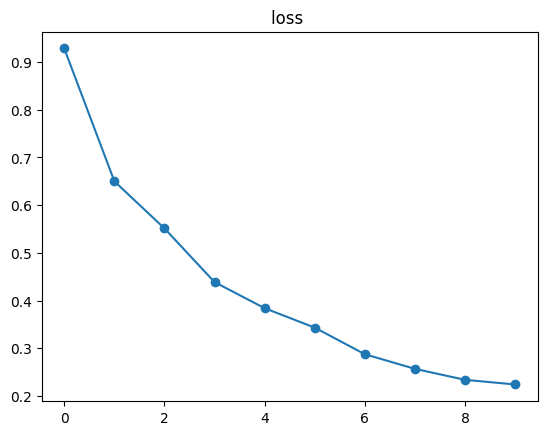

In [ ]:
plt.title('loss ')
plt.plot(history.history['loss'], marker='o')

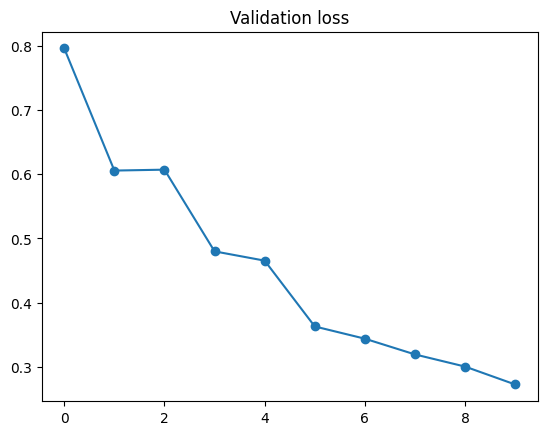

In [ ]:
plt.title('Validation loss')
plt.plot(history.history['val_loss'], marker = 'o')

building a custom deep learning model 

In [ ]:
model.save('vgg16_epochs_10.h5')